In [15]:
# Importando bibliotecas que vão ser utilizadadas para a visualização dos dados para analisar a composição e correlação entre eles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Lendo o arquivo tratado e reduzido anteriormente
df = pd.read_csv('DATABASE/base-reduzida-v3.csv', sep=',', encoding='utf-8', index_col=0)

In [17]:
# Visualizando o cabeçalho e alguns dados do dicionário
df.head()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Quantidade Bebida,...,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
57,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,36.0
59,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,54.0
61,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,51.0
65,11,2.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,2.0,4.0,1.0,NaN,24.0
94,11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,NaN,65.0


In [18]:
# Verificando a quantidade de linhas e colunas do arquivo
df.shape

(16776, 25)

In [19]:
# Verificando informações relevantes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16776 entries, 57 to 293718
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      16776 non-null  int64  
 1   Diagnóstico Depressão   16776 non-null  float64
 2   Estado de Saúde         16776 non-null  float64
 3   Pouco Interesse         16776 non-null  float64
 4   Sentimento Depressivo   16776 non-null  float64
 5   Sentimento de Fracasso  16776 non-null  float64
 6   Ideação Suicida         16776 non-null  float64
 7   Consumo Álcool          16776 non-null  float64
 8   Dias Álcool             1776 non-null   float64
 9   Quantidade Bebida       4401 non-null   float64
 10  Faltas por Bebida       4401 non-null   float64
 11  Dirigir Embriagado      2520 non-null   float64
 12  Idade Diagnóstico       8332 non-null   float64
 13  Visita Regular          8332 non-null   float64
 14  Motivo Não Visita       5309 non-nul

In [20]:
# Verificando a correlação entre as colunas
df.corr()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Quantidade Bebida,...,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
UF,1.000000,-0.067973,0.010713,0.020388,0.018680,0.003634,-0.015176,0.100081,0.049298,-0.158458,...,-0.061749,-0.017637,-0.007395,-0.044337,-0.033235,0.025649,-0.241272,-0.058293,-0.022829,0.067135
Diagnóstico Depressão,-0.067973,1.000000,-0.780960,-0.454972,-0.553667,-0.425867,-0.269700,-0.251839,NaN,-0.056332,...,NaN,NaN,NaN,NaN,0.090431,-0.225599,0.037099,-0.582744,-0.045965,-0.236054
Estado de Saúde,0.010713,-0.780960,1.000000,0.546439,0.635863,0.525335,0.380615,0.110165,0.011028,0.074184,...,-0.180440,-0.185775,0.068150,0.379354,-0.127687,0.177415,0.017302,0.722007,0.094392,0.220538
Pouco Interesse,0.020388,-0.454972,0.546439,1.000000,0.670029,0.584328,0.409044,0.084318,0.031572,0.075111,...,-0.141122,-0.208588,0.099949,0.426299,-0.080984,0.155589,0.017725,0.441565,0.091168,0.051798
Sentimento Depressivo,0.018680,-0.553667,0.635863,0.670029,1.000000,0.721096,0.478340,0.103306,-0.011955,0.068703,...,-0.164230,-0.227295,0.128600,0.443736,-0.089919,0.173485,0.012216,0.501059,0.098941,0.102643
Sentimento de Fracasso,0.003634,-0.425867,0.525335,0.584328,0.721096,1.000000,0.529566,0.089030,0.041004,0.084854,...,-0.110929,-0.188026,0.106452,0.429358,-0.106254,0.128710,0.027624,0.405809,0.109036,0.014176
Ideação Suicida,-0.015176,-0.269700,0.380615,0.409044,0.478340,0.529566,1.000000,0.042936,0.051291,0.058217,...,-0.091720,-0.147382,0.091764,0.359664,-0.125624,0.068403,0.022719,0.299779,0.091013,0.007761
Consumo Álcool,0.100081,-0.251839,0.110165,0.084318,0.103306,0.089030,0.042936,1.000000,NaN,0.167497,...,0.138560,0.082703,0.055762,-0.091539,0.022935,-0.048204,-0.068293,0.000793,0.008561,-0.079824
Dias Álcool,0.049298,NaN,0.011028,0.031572,-0.011955,0.041004,0.051291,NaN,1.000000,0.050530,...,0.004989,-0.001857,0.011519,0.063151,-0.011183,-0.227301,-0.048169,0.016464,0.089718,0.102230
Quantidade Bebida,-0.158458,-0.056332,0.074184,0.075111,0.068703,0.084854,0.058217,0.167497,0.050530,1.000000,...,0.093954,0.040543,0.068433,0.059786,-0.058747,-0.141417,0.148850,0.069651,0.040389,-0.181618


[]

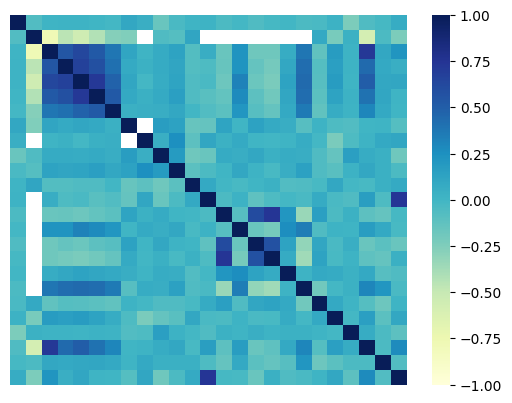

In [21]:
# Verificando como é a correlação das colunas do dataframe através de um heatmap
fig, ax = plt.subplots()
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=False, cmap='YlGnBu', linewidths=0, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

In [22]:
# Verificando valores ausentes (NaN) nas variáveis, com exceção dos atributos: 'PassengerId' e 'Name'

print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
UF : False -> 0
Diagnóstico Depressão : False -> 0
Estado de Saúde : False -> 0
Pouco Interesse : False -> 0
Sentimento Depressivo : False -> 0
Sentimento de Fracasso : False -> 0
Ideação Suicida : False -> 0
Consumo Álcool : False -> 0
Dias Álcool : True -> 15000
Quantidade Bebida : True -> 12375
Faltas por Bebida : True -> 12375
Dirigir Embriagado : True -> 14256
Idade Diagnóstico : True -> 8444
Visita Regular : True -> 8444
Motivo Não Visita : True -> 11467
Toma Medicamentos : True -> 8444
Último Atendimento : True -> 8444
Compareceu Consulta : True -> 14756
Limitação Atividade : True -> 8444
Diagnóstico Bipolar : True -> 14325
Sexo : False -> 0
Cor Raça : False -> 0
Estado de Saúde Geral : False -> 0
Motivo Impedimento : True -> 14489
Idade : False -> 0


In [23]:
# variáveis e tipo
df.dtypes

UF                          int64
Diagnóstico Depressão     float64
Estado de Saúde           float64
Pouco Interesse           float64
Sentimento Depressivo     float64
Sentimento de Fracasso    float64
Ideação Suicida           float64
Consumo Álcool            float64
Dias Álcool               float64
Quantidade Bebida         float64
Faltas por Bebida         float64
Dirigir Embriagado        float64
Idade Diagnóstico         float64
Visita Regular            float64
Motivo Não Visita         float64
Toma Medicamentos         float64
Último Atendimento        float64
Compareceu Consulta       float64
Limitação Atividade       float64
Diagnóstico Bipolar       float64
Sexo                      float64
Cor Raça                  float64
Estado de Saúde Geral     float64
Motivo Impedimento        float64
Idade                     float64
dtype: object

In [24]:
# média, mediana, máximo e mínimo, utilizado para calcular uma estatística descritiva das colunas 
df.describe()

,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,Quantidade Bebida,...,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Diagnóstico Bipolar,Sexo,Cor Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
count,16776.000000,16776.000000,16776.000000,16776.000000,16776.000000,16776.000000,16776.000000,16776.000000,1776.000000,4401.000000,...,8332.000000,8332.000000,2020.000000,8332.000000,2451.000000,16776.000000,16776.000000,16776.000000,2287.000000,16776.000000
mean,32.024261,1.503338,1.793038,1.606462,1.643240,1.425191,1.159394,1.368205,1.779279,3.565326,...,1.478157,2.873980,1.471287,1.863658,1.838025,1.657725,2.488019,2.086791,6.255794,49.871543
std,11.551538,0.500004,1.022298,0.952270,0.987426,0.860392,0.556965,0.666624,1.730176,3.633664,...,0.499553,1.800241,0.763628,1.161495,0.368503,0.474485,1.437078,1.002876,4.813375,16.941252
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000
25%,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,36.000000
50%,32.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,49.000000
75%,41.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,...,2.000000,5.000000,2.000000,3.000000,2.000000,2.000000,4.000000,3.000000,12.000000,62.000000
max,53.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,7.000000,42.000000,...,2.000000,6.000000,3.000000,5.000000,2.000000,2.000000,9.000000,5.000000,14.000000,106.000000


In [25]:
# proporção entre classes exemplo, conta a quantidade de frequência dos dados
counts = df['UF'].value_counts()
counts 

35    1395
31    1320
41    1021
43    1010
33     978
42     936
32     822
23     675
50     619
26     614
52     599
53     563
25     547
21     527
29     510
24     501
15     491
13     474
27     460
51     458
28     418
22     404
11     376
12     347
17     276
14     259
16     176
Name: UF, dtype: int64

<AxesSubplot: >

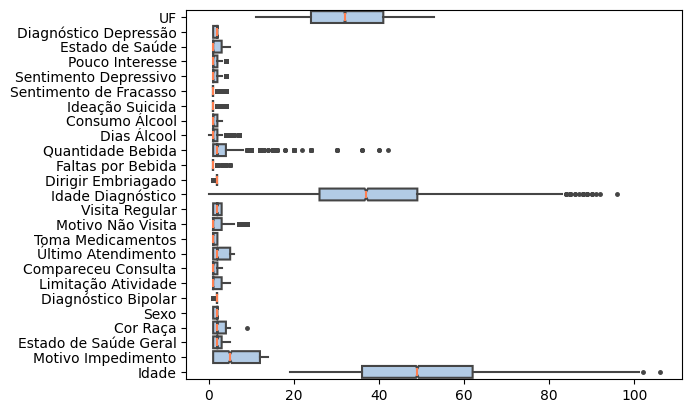

In [26]:
# Todos os outliers da base
sns.boxplot(
   data = df,
   orient =  "h",
   showcaps = False,
   notch = True,
   flierprops = {"marker": "."},
   boxprops = {
      "facecolor": (.4, .6, .8, .5)
   },
   medianprops = {
      "color": "coral"
   }
)

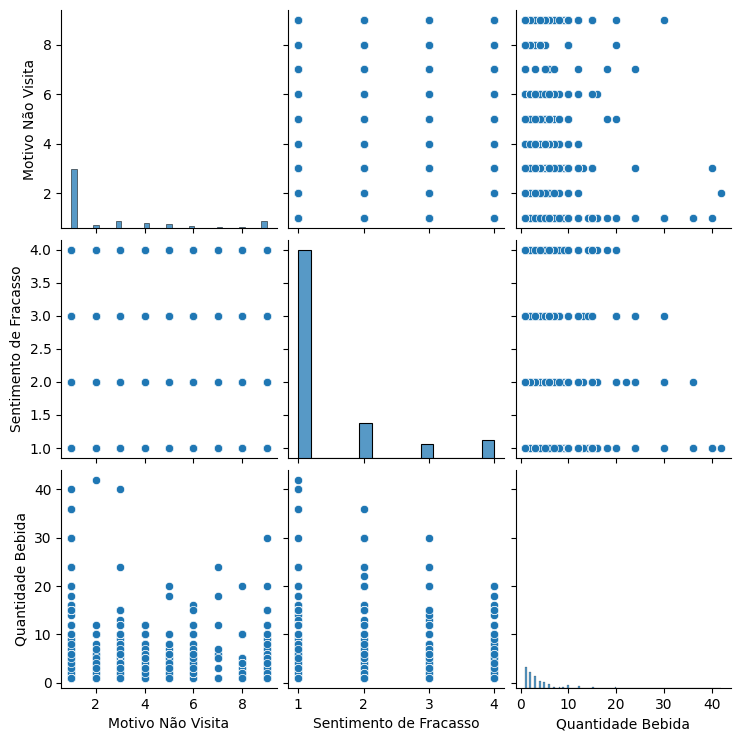

In [27]:
sns.pairplot(df[['Motivo Não Visita', 'Sentimento de Fracasso', 'Quantidade Bebida']])

<AxesSubplot: >

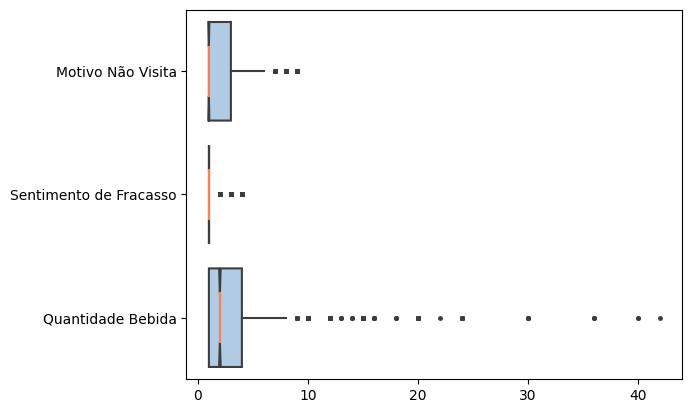

In [28]:
sns.boxplot(
   data = df[['Motivo Não Visita', 'Sentimento de Fracasso', 'Quantidade Bebida']],
   orient =  "h",
   showcaps = False,
   notch = True,
   flierprops = {"marker": "."},
   boxprops = {
      "facecolor": (.4, .6, .8, .5)
   },
   medianprops = {
      "color": "coral"
   }
)